In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.decomposition import PCA
from scipy.stats import entropy

In [46]:
def run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
    models = {
        "LogisticRegression": LogisticRegression(),
        "SVC": SVC(),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "KNeighborsClassifier": KNeighborsClassifier(),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "GaussianNB": GaussianNB(),
    }

    # Create an empty DataFrame to store accuracy
    model_performance = []

    for name, model in models.items():
        model.fit(X_train_scaled, y_train_encoded)
        predictions = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test_encoded, predictions)
        print(f"{name} Accuracy:", accuracy)
        model_performance.append({"Model": name, "Accuracy": accuracy})

    # For the Sequential model
    sequential_model = Sequential()
    sequential_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
    sequential_model.add(Dense(32, activation='relu'))
    sequential_model.add(Dense(1, activation='sigmoid'))
    sequential_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    sequential_model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=10, verbose=0)
    loss, accuracy = sequential_model.evaluate(X_test_scaled, y_test_encoded)
    print(f"Sequential Model Accuracy: {accuracy}")
    print(f"Sequential Model Loss: {loss}")
    model_performance.append({"Model": "Sequential", "Accuracy": accuracy})

    return pd.DataFrame(model_performance)

def automate_pca(pca_components, X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded):
  pca = PCA(n_components=pca_components)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.transform(X_test_scaled)
  
  models = run_all_models(X_train_pca, X_test_pca, y_train_encoded, y_test_encoded)
  print(models)
  
def labels_to_probabilities(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()
    return probabilities

def calculate_entropy(df:pd.DataFrame)-> pd.DataFrame:
  """_summary_

  Args:
      df (pd.DataFrame): _description_

  Returns:
      pd.DataFrame: _description_
  """

  column_entropy_info = {}
  for col in df.columns:
    probabilities = labels_to_probabilities(df[col])
    entropy_value = entropy(probabilities, base=2)
    column_entropy_info[col] = {
          'entropy': entropy_value
      }

  return pd.DataFrame(column_entropy_info)

In [67]:
df = pd.read_csv("Train.csv")
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [48]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [51]:
df["Mode_of_Shipment"].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [52]:
df["Product_importance"].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

In [53]:
df["Warehouse_block"].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [68]:
warehouse_block_dict = {"A":0, "B":1, "C":2, "D":3,"F":4}
product_dict= {"low":0,"medium":1,"high":2}
mode_of_shipment_dict= {"Ship":0,"Flight":1,"Road":2}

df["Gender"] = df["Gender"].apply(lambda x: 1 if x == "M" else 0)
df["Product_importance"] = df["Product_importance"].apply(lambda x: product_dict[x])
df["Warehouse_block"] = df["Warehouse_block"].apply(lambda x: warehouse_block_dict[x])
df["Mode_of_Shipment"] = df["Mode_of_Shipment"].apply(lambda x: mode_of_shipment_dict[x])

In [69]:
df.drop("ID", axis=1, inplace=True)

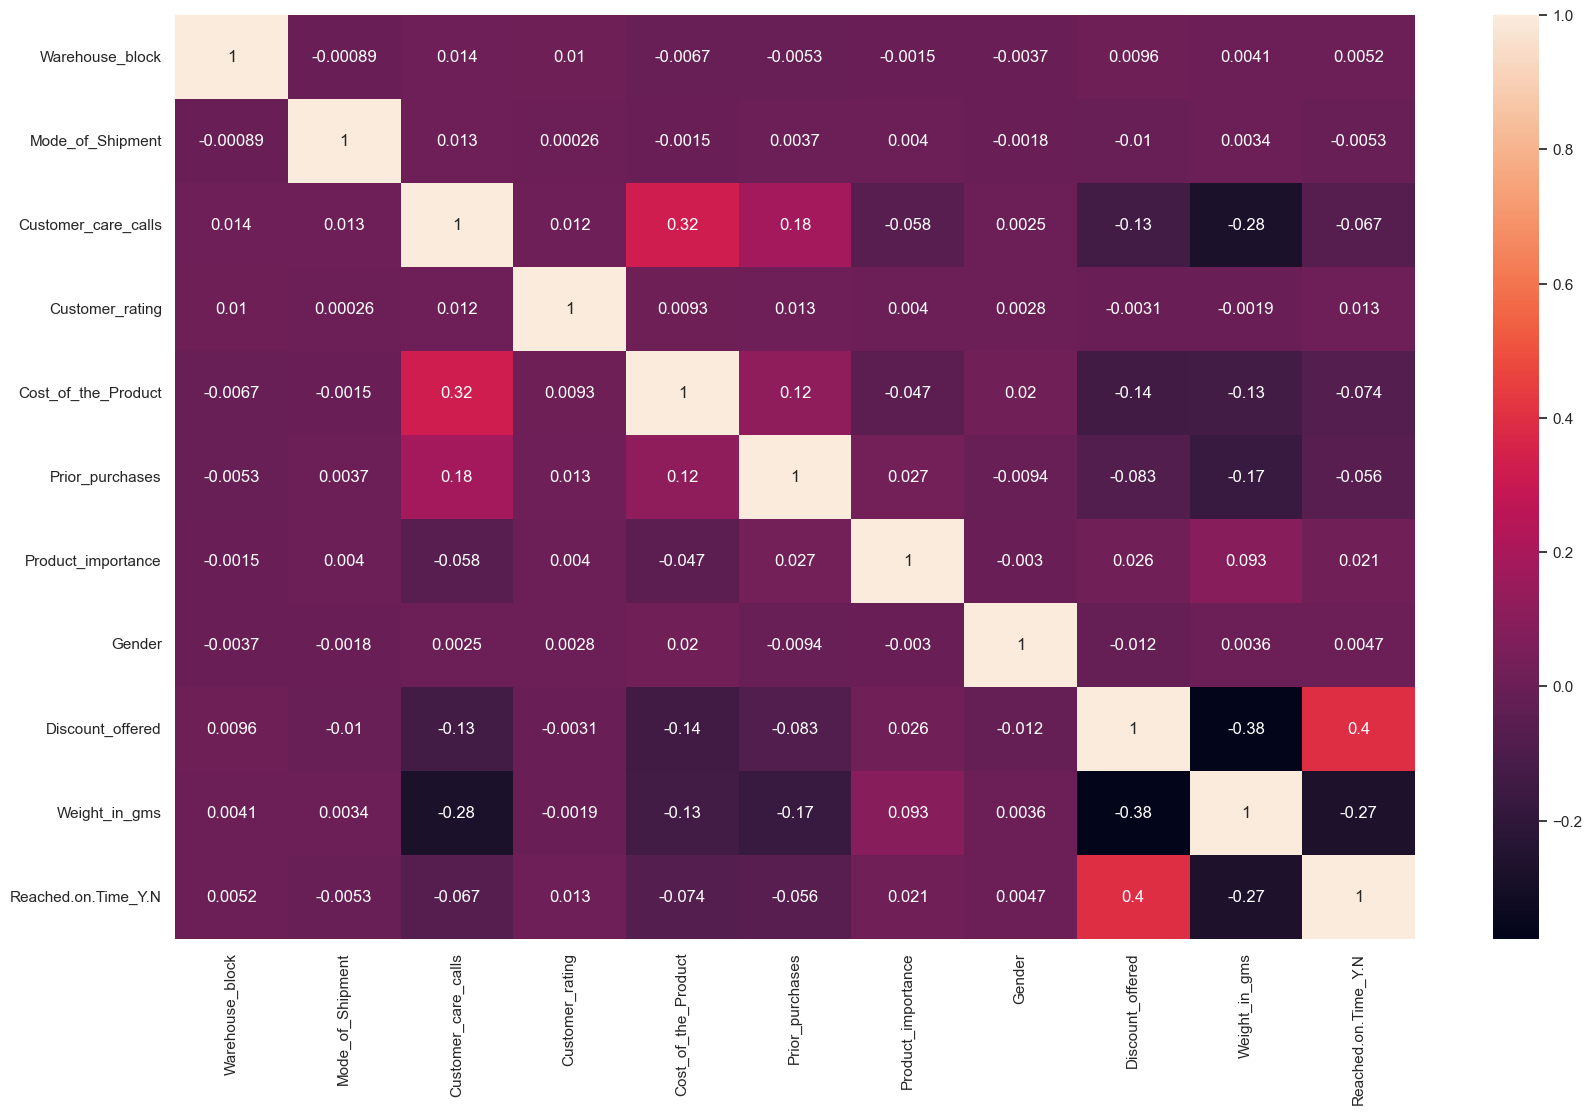

In [56]:
relations = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(data=relations, annot=True)
plt.show()

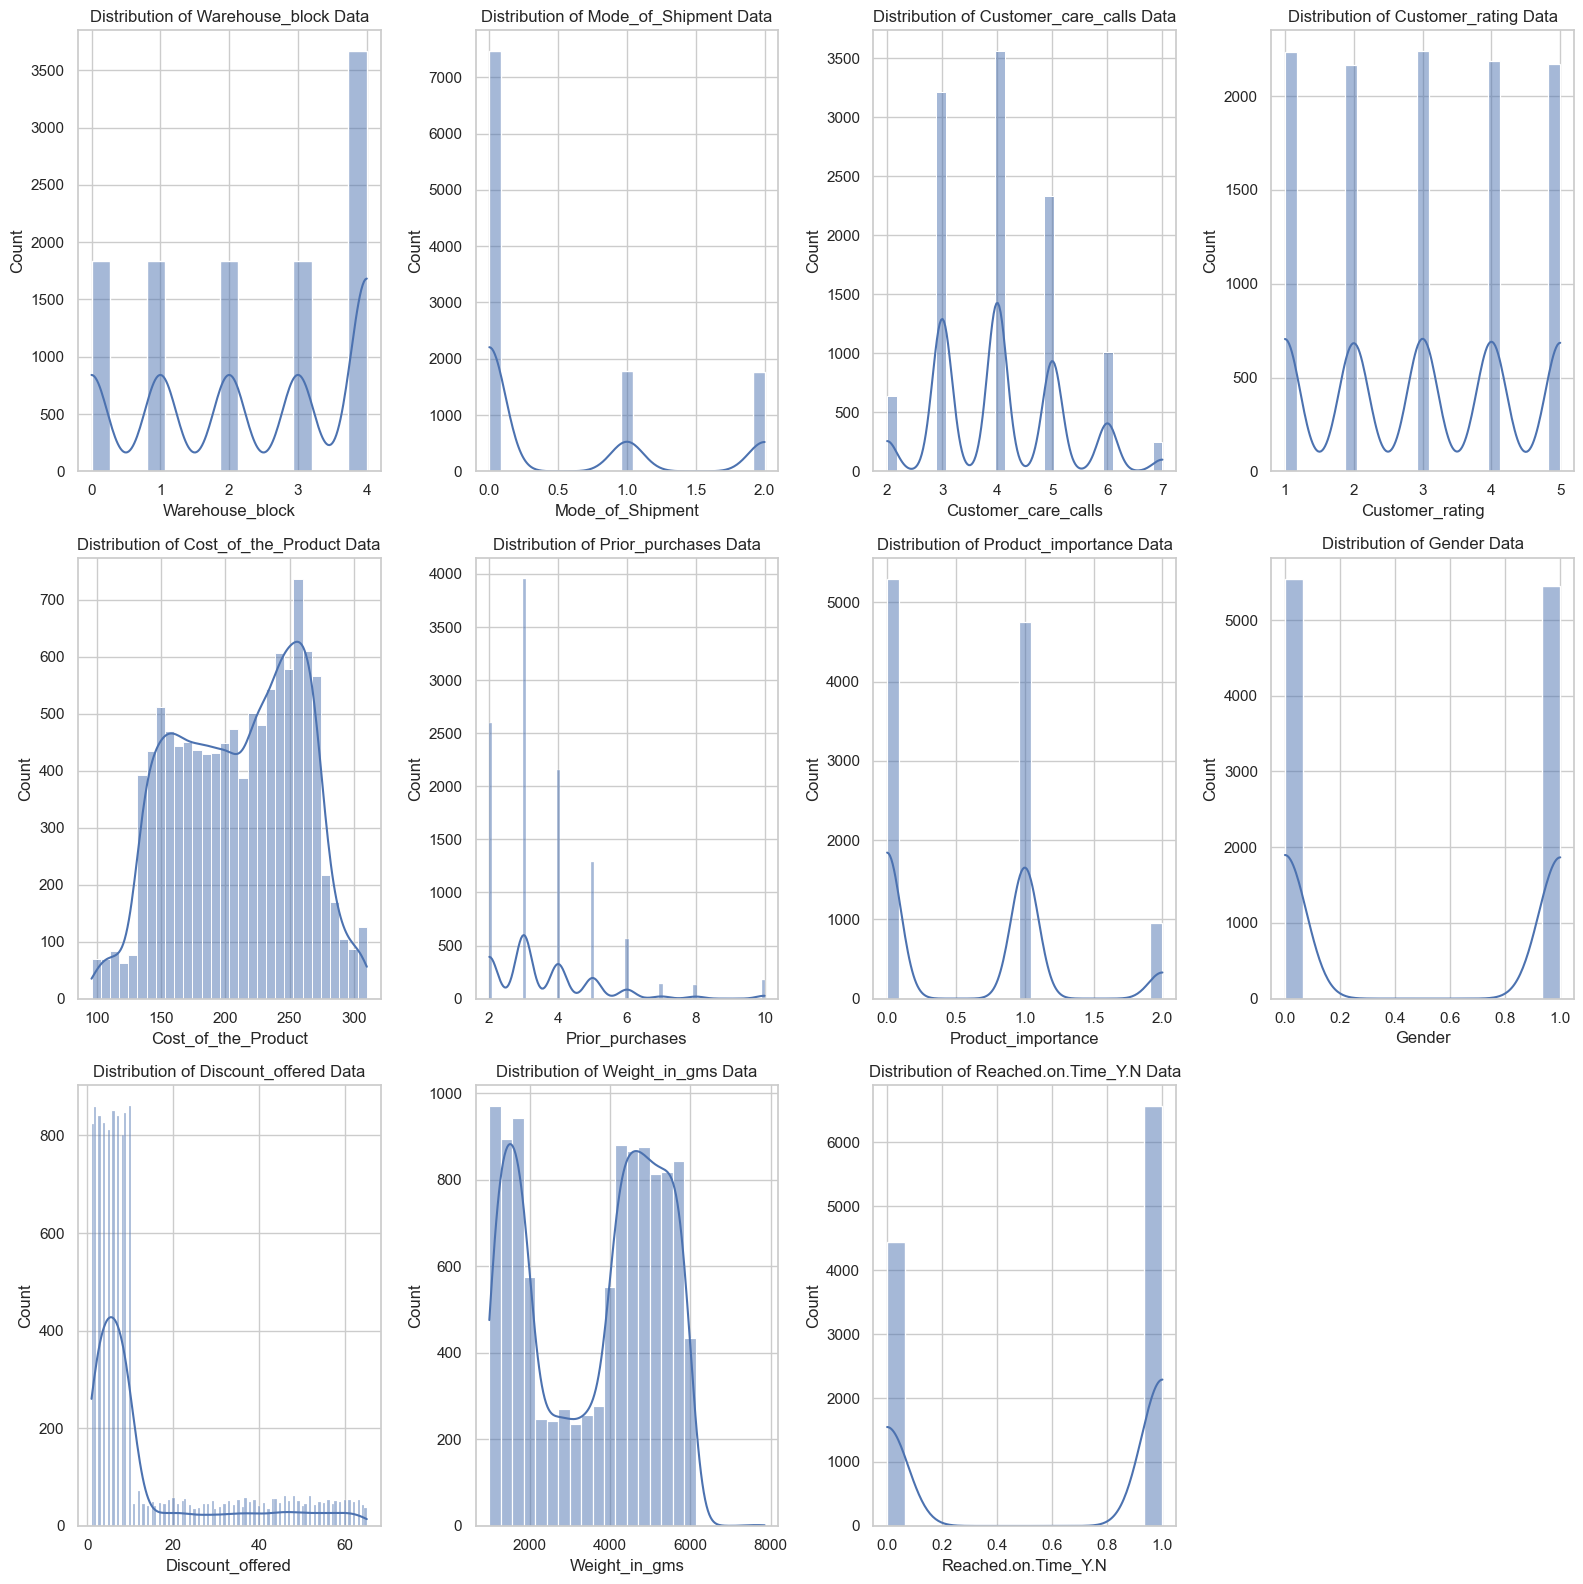

In [57]:
plt.figure(figsize = (16, 16))
num_plots = len(df.columns) - 1  # Exclude the last column
rows = (num_plots + 3) // 4  # Calculate the number of rows needed, add 3 to round up

for i, col in enumerate(df.columns):
    plt.subplot(rows, 4, i+1)
    sns.histplot(df[col], kde= True)
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()

In [58]:
entropy_df = calculate_entropy(df)
entropy_df

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
entropy,2.251659,1.227655,2.197354,2.321781,7.47326,2.313726,1.335507,0.999951,4.705256,11.728115,0.972854


In [59]:
df.describe()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,2.333394,0.481589,4.054459,2.990545,210.196836,3.567597,0.604600,0.495863,13.373216,3634.016729,0.596691
std,1.490726,0.754813,1.141490,1.413603,48.063272,1.522860,0.641464,0.500006,16.205527,1635.377251,0.490584
min,0.000000,0.000000,2.000000,1.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1001.000000,0.000000
25%,1.000000,0.000000,3.000000,2.000000,169.000000,3.000000,0.000000,0.000000,4.000000,1839.500000,0.000000
50%,3.000000,0.000000,4.000000,3.000000,214.000000,3.000000,1.000000,0.000000,7.000000,4149.000000,1.000000
75%,4.000000,1.000000,5.000000,4.000000,251.000000,4.000000,1.000000,1.000000,10.000000,5050.000000,1.000000
max,4.000000,2.000000,7.000000,5.000000,310.000000,10.000000,2.000000,1.000000,65.000000,7846.000000,1.000000


In [60]:
max_product, min_product = df["Cost_of_the_Product"].max(), df["Cost_of_the_Product"].min()

In [61]:
max_discount, min_discount = df["Discount_offered"].max(), df["Discount_offered"].min()
print(max_discount, min_discount)

65 1


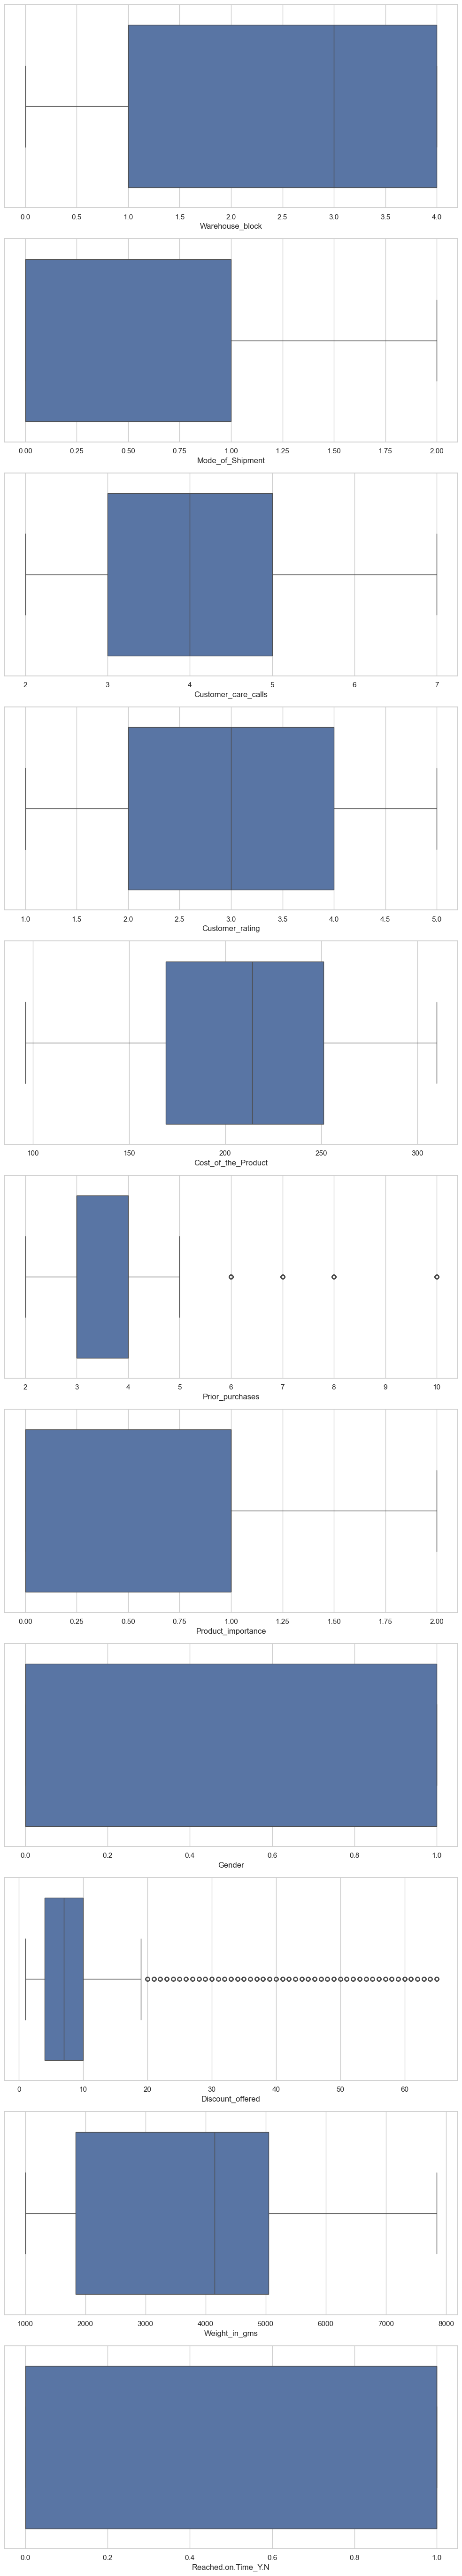

In [62]:
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(10, 5 * len(df.columns)))

# Iterate through columns and create box plots
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [71]:
X, y = df.drop("Reached.on.Time_Y.N", axis=1), df["Reached.on.Time_Y.N"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.6445454545454545
SVC Accuracy: 0.6604545454545454
DecisionTreeClassifier Accuracy: 0.6540909090909091
RandomForestClassifier Accuracy: 0.6604545454545454
KNeighborsClassifier Accuracy: 0.6463636363636364
GradientBoostingClassifier Accuracy: 0.6872727272727273
GaussianNB Accuracy: 0.655
69/69 [==============================] - 0s 543us/step - loss: 0.5950 - accuracy: 0.6468
Sequential Model Accuracy: 0.6468181610107422
Sequential Model Loss: 0.5950071811676025


,Model,Accuracy
0,LogisticRegression,0.644545
1,SVC,0.660455
2,DecisionTreeClassifier,0.654091
3,RandomForestClassifier,0.660455
4,KNeighborsClassifier,0.646364
5,GradientBoostingClassifier,0.687273
6,GaussianNB,0.655000
7,Sequential,0.646818


In [66]:
X, y = df.drop("Reached.on.Time_Y.N", axis=1), df["Reached.on.Time_Y.N"]


X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()

X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

models = run_all_models(X_train_scaled, X_test_scaled, y_train_encoded, y_test_encoded)
models

LogisticRegression Accuracy: 0.5596681557115507
SVC Accuracy: 0.5985960433950224
DecisionTreeClassifier Accuracy: 0.541799617102744
RandomForestClassifier Accuracy: 0.5768985322271857
KNeighborsClassifier Accuracy: 0.5379706445437141
GradientBoostingClassifier Accuracy: 0.614550095724314
GaussianNB Accuracy: 0.5711550733886407
49/49 [==============================] - 0s 461us/step - loss: 0.6666 - accuracy: 0.5756
Sequential Model Accuracy: 0.5756222009658813
Sequential Model Loss: 0.666631817817688


,Model,Accuracy
0,LogisticRegression,0.559668
1,SVC,0.598596
2,DecisionTreeClassifier,0.541800
3,RandomForestClassifier,0.576899
4,KNeighborsClassifier,0.537971
5,GradientBoostingClassifier,0.614550
6,GaussianNB,0.571155
7,Sequential,0.575622
